# Weather Notebook

This notebook will provide code snippets and explanations for each task, starting from creating directory structures to downloading weather data and processing it.

### Library

In [141]:
#Import required libraries

import pandas as pd # for data manipulation and analysis
import matplotlib.pyplot as plt  # for data visualisation and graphical plotting
import seaborn as sns  # built on top of matplotlib with similar functionalities
import numpy as np # for mathematical operations on arrays.
import datetime as dt

### Collecting the Data

**1. Create Directory Structure**

The `mkdir` command in Linux is used to create directories. It stands for "make directory" and can create one or multiple directories at once.

https://www.geeksforgeeks.org/mkdir-command-in-linux-with-examples/


```bash
mkdir -p computer_infrastructure/data/timestamps/weather 
```

**2. Timestamps**

The `date` command is a tool used to display the current date and time, as well as set the system date and time. 

https://www.tutorialspoint.com/date-command-in-linux



```bash
date + "%Y/%m/%d_%H:%M:%S>>now.txt
```

where: %Y = Year, %m = Month and %d = Date
       %H = Hour, %M = Minutes and %S = Seconds 
       
The output format is:
2024/12/07 14:30:00

**3. Formatting Timestamps**

This command generated timestamps and appended them onto formatted.txt file

```bash
date + "%Y%m%d_%H%M%S>>formatted.txt
```
Output format: 20241209_130003 (File created at 1:00:03 PM on December 09, 2024).


`touch`....

**4. Creating Timestamped Files**

The `touch` command in Linux is a tool used for creating empty files and updating the timestamps of existing files. 

https://www.serveracademy.com/blog/how-to-use-the-touch-command-in-linux/

```bash
touch `date +"%Y%m%d_%H%M%S.txt"`
```
Output format: 20241025_222322.txt (File created at 10:23:22 PM on October 25, 2024.)

**5. Dowloading Today's weather**

`Wget` is a command-line utility for downloading files from the web. 

https://linuxize.com/post/wget-command-examples/

```bash
wget -O weather.json" https://prodapi.metweb.ie/observations/athenry/today
```

**6. Timestamp the Data in YYYYmmdd_HHMMSS.json Format**

Modifying the downloaded weather file with a timestamped name.

```bash
wget -O data/weather/`date +"%Y%m%d_%H%M%S.json"` https://prodapi.metweb.ie/observations/athenry/today

```
Output format:20241201_221719.json (File created at 10:17:19 PM on December 01, 2024)

**7. Bash script**:

Text file containing a series of commands written for the bash shell, used to automate tasks, execute multiple commands, or create simple programs.

https://linuxconfig.org/bash-scripting-tutorial

```bash

#!/bin/bash
date
echo "Downloading weather data"
wget -O data/weather/`date +"%Y%m%d_%H%M%S.json"` https://prodapi.metweb.ie/observations/athenry/today
echo "Weather data downloaded"

```

### Weather Analysis

#### About the Dataset.

This weather dataset contains a list of observations for every hour of the current day for a synoptic station in Athenry, Co Galway.
Time values are Local times and the file is updated hourly. 

Values for each hour include: 

- Name
- Dry bulb temperature in whole degrees
- Weather description, Windspeed (kt)
- Cardinal Wind Direction
- Relative Humidity (%)
- Rainfall (mm)
- msl Pressure (mbar) 
- Day of the week
- Date
- Time of observation.

https://data.gov.ie/dataset/todays-weather-athenry

#### Load the Weather Data

In [142]:
# Load in data
df = pd.read_json('data/weather/weather.json')

# Display the first few rows
df.head()

,name,temperature,symbol,weatherDescription,text,windSpeed,windGust,cardinalWindDirection,windDirection,humidity,rainfall,pressure,dayName,date,reportTime
0,Athenry,6.0,46n,Light rain,"""Light rain """,4,-,E,90,99,0.01,1041.0,Wednesday,2024-11-13,00:00
1,Athenry,5.0,05n,Rain showers,"""Rain shower""",4,-,NE,45,99,0.01,1040.0,Wednesday,2024-11-13,01:00
2,Athenry,5.0,05n,Rain showers,"""Rain shower""",2,-,N,0,99,0.10,1040.0,Wednesday,2024-11-13,02:00
3,Athenry,6.0,15n,Fog / Mist,"""Fog thinning""",4,-,SE,135,99,0.00,1040.0,Wednesday,2024-11-13,03:00
4,Athenry,6.0,15n,Fog / Mist,"""Fog thinning""",4,-,E,90,99,0.00,1040.0,Wednesday,2024-11-13,04:00


#### Examine the structure

In [143]:
# Check column names and data types.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19 entries, 0 to 18
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   name                   19 non-null     object        
 1   temperature            13 non-null     float64       
 2   symbol                 19 non-null     object        
 3   weatherDescription     19 non-null     object        
 4   text                   19 non-null     object        
 5   windSpeed              19 non-null     object        
 6   windGust               19 non-null     object        
 7   cardinalWindDirection  19 non-null     object        
 8   windDirection          19 non-null     int64         
 9   humidity               19 non-null     int64         
 10  rainfall               11 non-null     float64       
 11  pressure               13 non-null     float64       
 12  dayName                19 non-null     object        
 13  date   

In [144]:
# Number or rows and number of columns
df.shape

(19, 15)

#### Convert 'text'column to 'weather condition' column.

In [145]:
# Rename text column
df = df.rename(columns={'text': 'weather_condition'})

#### Change data type to floats.

`pandas.to_numeric`: Convert argument to a numeric type.'

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html#pandas-to-numeric

In [146]:
# Convert windspeed to floats
df['windSpeed'] = pd.to_numeric(df['windSpeed'], errors='coerce')

### Statistical Analysis

In [147]:
df.describe()

,temperature,windSpeed,windDirection,humidity,rainfall,pressure,date
count,13.000000,11.000000,19.000000,19.000000,11.000000,13.000000,19
mean,5.846154,4.000000,73.421053,26.052632,0.029091,1039.923077,2024-11-13 00:00:00
min,4.000000,2.000000,0.000000,-99.000000,0.000000,1039.000000,2024-11-13 00:00:00
25%,5.000000,4.000000,0.000000,-99.000000,0.000000,1040.000000,2024-11-13 00:00:00
50%,5.000000,4.000000,45.000000,99.000000,0.000000,1040.000000,2024-11-13 00:00:00
75%,6.000000,4.000000,135.000000,99.000000,0.055000,1040.000000,2024-11-13 00:00:00
max,9.000000,6.000000,225.000000,99.000000,0.100000,1041.000000,2024-11-13 00:00:00
std,1.519109,1.264911,82.446155,98.127736,0.045707,0.493548,NaN



`pandas.unique`: Return unique values based on a hash table.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.unique.html

In [148]:
# No of unique values in all columns
df.nunique()

name                      1
temperature               4
symbol                    7
weatherDescription        6
weather_condition         8
windSpeed                 3
windGust                  1
cardinalWindDirection     8
windDirection             6
humidity                  2
rainfall                  3
pressure                  3
dayName                   1
date                      1
reportTime               19
dtype: int64

In [149]:
# List of weather conditions.
df['weather_condition'].unique()

array(['"Light rain "', '"Rain shower"', '"Fog thinning"',
       '"Heavy rain "', '"Heavy rain shower"', '"Fog"', '',
       '"Fog thickening"'], dtype=object)

#### Values for each weather condition 

In [150]:
# Values for weather conditions
df['weather_condition'].value_counts()

weather_condition
                       7
"Fog thinning"         3
"Rain shower"          2
"Light rain "          2
"Fog"                  2
"Heavy rain "          1
"Heavy rain shower"    1
"Fog thickening"       1
Name: count, dtype: int64

#### Mean windspeed and temperature value against weather condition.

`The groupby()` function allows you to group your data and execute functions on these groups.

https://www.w3schools.com/python/pandas/ref_df_groupby.asp

In [151]:
#Calculate  mean windspeed for each weather condition.
df.groupby('weather_condition').mean('windSpeed')

#Calculate  mean temperature for each weather condition.
df.groupby('weather_condition').mean('temperature')

,temperature,windSpeed,windDirection,humidity,rainfall,pressure
weather_condition,,,,,,
,5.000000,NaN,0.0,-99.0,NaN,1040.0
"""Fog thickening""",9.000000,4.000000,225.0,99.0,0.000,1039.0
"""Fog thinning""",5.333333,4.666667,135.0,99.0,0.000,1040.0
"""Fog""",5.000000,2.000000,67.5,99.0,0.000,1040.0
"""Heavy rain """,6.000000,4.000000,135.0,99.0,0.100,1040.0
"""Heavy rain shower""",5.000000,4.000000,135.0,99.0,0.100,1040.0
"""Light rain """,7.500000,5.000000,157.5,99.0,0.010,1040.0
"""Rain shower""",5.000000,3.000000,22.5,99.0,0.055,1040.0


#### Minimum values for each weather condition

In [152]:
# Minimum value for each weather condition.

df.groupby('weather_condition').min()

,name,temperature,symbol,weatherDescription,windSpeed,windGust,cardinalWindDirection,windDirection,humidity,rainfall,pressure,dayName,date,reportTime
weather_condition,,,,,,,,,,,,,,
,Athenry,5.0,,N/A,NaN,-,-99,0,-99,NaN,1040.0,Wednesday,2024-11-13,10:00
"""Fog thickening""",Athenry,9.0,15n,Fog / Mist,4.0,-,SW,225,99,0.00,1039.0,Wednesday,2024-11-13,18:00
"""Fog thinning""",Athenry,4.0,15n,Fog / Mist,4.0,-,E,90,99,0.00,1040.0,Wednesday,2024-11-13,03:00
"""Fog""",Athenry,5.0,15d,Fog / Mist,2.0,-,,0,99,0.00,1040.0,Wednesday,2024-11-13,08:00
"""Heavy rain """,Athenry,6.0,10n,Heavy rain,4.0,-,SE,135,99,0.10,1040.0,Wednesday,2024-11-13,05:00
"""Heavy rain shower""",Athenry,5.0,41n,Heavy rain showers,4.0,-,SE,135,99,0.10,1040.0,Wednesday,2024-11-13,06:00
"""Light rain """,Athenry,6.0,46n,Light rain,4.0,-,E,90,99,0.01,1039.0,Wednesday,2024-11-13,00:00
"""Rain shower""",Athenry,5.0,05n,Rain showers,2.0,-,N,0,99,0.01,1040.0,Wednesday,2024-11-13,01:00


#### Maximum values for each weather condition

In [153]:
# Maximum value for each weather condition.

df.groupby('weather_condition').max()

,name,temperature,symbol,weatherDescription,windSpeed,windGust,cardinalWindDirection,windDirection,humidity,rainfall,pressure,dayName,date,reportTime
weather_condition,,,,,,,,,,,,,,
,Athenry,5.0,,N/A,NaN,-,-99,0,-99,NaN,1040.0,Wednesday,2024-11-13,16:00
"""Fog thickening""",Athenry,9.0,15n,Fog / Mist,4.0,-,SW,225,99,0.00,1039.0,Wednesday,2024-11-13,18:00
"""Fog thinning""",Athenry,6.0,15n,Fog / Mist,6.0,-,SE,180,99,0.00,1040.0,Wednesday,2024-11-13,07:00
"""Fog""",Athenry,5.0,15d,Fog / Mist,2.0,-,SE,135,99,0.00,1040.0,Wednesday,2024-11-13,09:00
"""Heavy rain """,Athenry,6.0,10n,Heavy rain,4.0,-,SE,135,99,0.10,1040.0,Wednesday,2024-11-13,05:00
"""Heavy rain shower""",Athenry,5.0,41n,Heavy rain showers,4.0,-,SE,135,99,0.10,1040.0,Wednesday,2024-11-13,06:00
"""Light rain """,Athenry,9.0,46n,Light rain,6.0,-,SW,225,99,0.01,1041.0,Wednesday,2024-11-13,17:00
"""Rain shower""",Athenry,5.0,05n,Rain showers,4.0,-,NE,45,99,0.10,1040.0,Wednesday,2024-11-13,02:00


### Cleaning Data

In [154]:
# Check for missing values
df.isnull().sum()

name                     0
temperature              6
symbol                   0
weatherDescription       0
weather_condition        0
windSpeed                8
windGust                 0
cardinalWindDirection    0
windDirection            0
humidity                 0
rainfall                 8
pressure                 6
dayName                  0
date                     0
reportTime               0
dtype: int64

#### Remove missing values

In [155]:
# Drop NULL values
df.dropna(inplace=True)

In [156]:
# Check if data is clean
df.isnull().sum()

name                     0
temperature              0
symbol                   0
weatherDescription       0
weather_condition        0
windSpeed                0
windGust                 0
cardinalWindDirection    0
windDirection            0
humidity                 0
rainfall                 0
pressure                 0
dayName                  0
date                     0
reportTime               0
dtype: int64

### Data Visualisation

### Set index to `datetime`.

`DatetimeIndex` is a fundamental object in Pandas for handling time series data, allowing for precise date and time indexing.

https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DatetimeIndex.html#pandas-datetimeindex


In [157]:
df.set_index('date', inplace=True)
df.head(3)

,name,temperature,symbol,weatherDescription,weather_condition,windSpeed,windGust,cardinalWindDirection,windDirection,humidity,rainfall,pressure,dayName,reportTime
date,,,,,,,,,,,,,,
2024-11-13,Athenry,6.0,46n,Light rain,"""Light rain """,4.0,-,E,90,99,0.01,1041.0,Wednesday,00:00
2024-11-13,Athenry,5.0,05n,Rain showers,"""Rain shower""",4.0,-,NE,45,99,0.01,1040.0,Wednesday,01:00
2024-11-13,Athenry,5.0,05n,Rain showers,"""Rain shower""",2.0,-,N,0,99,0.10,1040.0,Wednesday,02:00


#### Distribution of Temperature and Windspeed.


Line Chart

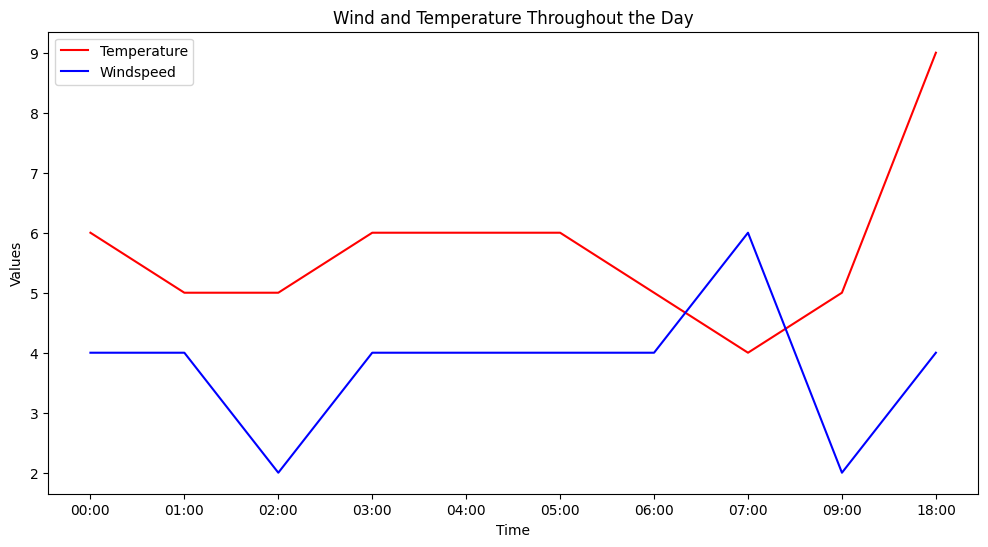

In [158]:
import matplotlib.pyplot as plt

# Assuming 'date' column exists as a time index
plt.figure(figsize=(12, 6))
plt.plot(df['reportTime'], df['temperature'], label='Temperature', color='red')
plt.plot(df['reportTime'], df['windSpeed'], label='Windspeed', color='blue')
plt.title("Wind and Temperature Throughout the Day")
plt.xlabel("Time")
plt.ylabel("Values")
plt.legend()
plt.savefig('img/dailywind_temp')


Histogram

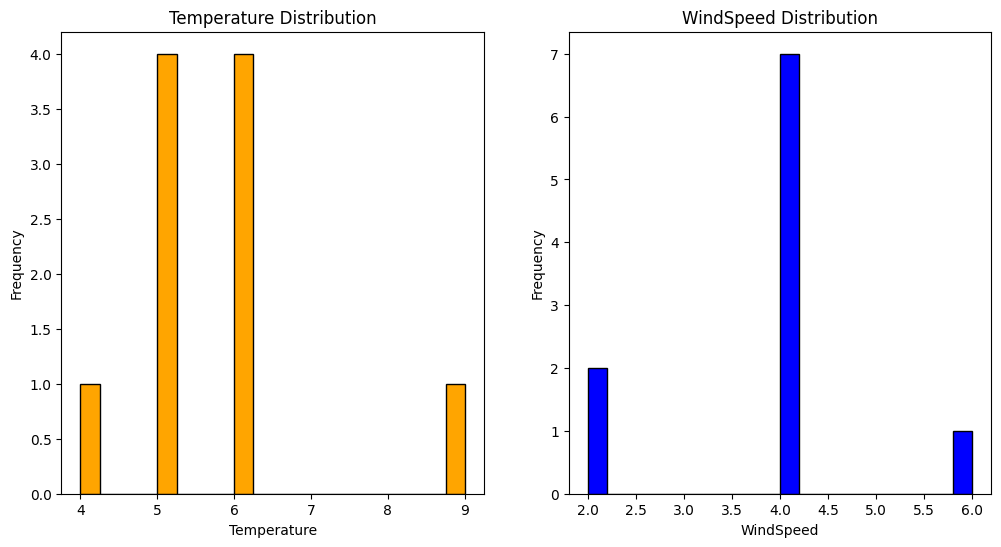

In [159]:
plt.figure(figsize=(12, 6))

# Temperature Distribution
plt.subplot(1, 2, 1)
plt.hist(df['temperature'], bins=20, color='orange', edgecolor='black')
plt.title("Temperature Distribution")
plt.xlabel("Temperature")
plt.ylabel("Frequency")

# Windspeed Distribution
plt.subplot(1, 2, 2)
plt.hist(df['windSpeed'], bins=20, color='blue', edgecolor='black')
plt.title("WindSpeed Distribution")
plt.xlabel("WindSpeed")
plt.ylabel("Frequency")

plt.savefig('img/temp_wind_distribution')


# End